In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [101]:
data = pd.read_csv('readmit_w_counts.csv')
#data.drop('HSP_ACCOUNT_ID',axis=1,inplace=True)

In [102]:
data = data[data['Days_Stay_Current'] >= 0]
data = data.dropna(axis=0,how='any')

def squish(val):
    if val > 0:
        return 1
    else:
        return 0
    
data['CntAdmitsSubsequent'] = data['CntAdmitsSubsequent'].apply(lambda x: squish(x))
data['ImagingCount'] = data['ImagingCount'].apply(lambda x: squish(x))
data.drop(['Corticosteroids.1'], axis=1, inplace=True)


In [104]:
group_names = [1, 2, 3, 4, 5]
bins = [-1,18,40,60,80,150]
data['Age'] = pd.cut(data['Age'], bins, labels=group_names)

group_names = [1, 2, 3, 4, 5, 6]
bins = [-1,10,20,30,50,100,1500]
data['NumberActiveMedOrders'] = pd.cut(data['NumberActiveMedOrders'], bins, labels=group_names)

group_names = [1, 2, 3, 4, 5, 6]
bins = [-1,0,3,6,10,100,1500]
data['Days_Stay_Current'] = pd.cut(data['Days_Stay_Current'], bins, labels=group_names)

#data['Days_Stay_Current']
#data['CntNumPastEDVisits']


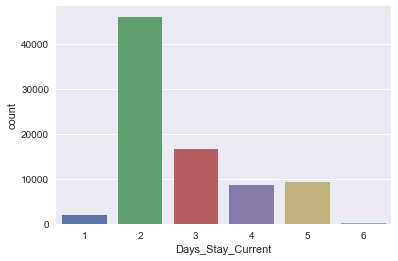

In [106]:
#sns.distplot(data['Days_Stay_Current'])
sns.countplot(data['Days_Stay_Current'])

In [ ]:
isPeds = False

if isPeds:
    data = data[data['Age'] <= 18]
    #data.drop(['BUNVal','CreatinineVal','PO4Val'], axis=1)
else:
    data = data[data['Age'] >= 18]
    data.drop(['BUNVal'], axis=1)


#data = data[data['HSP_ACCOUNT_ID'] >= 40000000]


In [ ]:
def binnify(col, number):
    num_range = col.max() - col.min()
    step = num_range / number
     
    print(step)
    
binnify(data['Age'], 5)

In [ ]:
data.describe()

In [ ]:
#data.info()

In [ ]:
#cystic fibrosis, cerebral palsy, central line, sickle cell, social work involvement, G tube, 
#failure to thrive, gestational age, albumin is low

#drop createnine, PO4 for peds

In [ ]:
#dummify count vars

#def dummy(val):
#    if val == 0:
#        return 0
#    else:
#        return 1

#def dummy_col(col):
#    return col.apply(lambda x: dummy(x))

#dummycols = ['Anticoagulants', 'Corticosteroids', 'NSAIDs', 'UlcerMeds',
#             'ImagingCount', 'EKGCount', 'RestraintCount', 'ElectroylyteDisorderDX', 'DrugAbuseDX' ]

#for i in range(0,len(dummycols)):
#    data[dummycols[i]] = dummy_col(data[dummycols[i]])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
har = data['HSP_ACCOUNT_ID']
data.drop(['HSP_ACCOUNT_ID', 'AdmDate', 'DischDate'], axis=1, inplace=True)
y = data['CntAdmitsSubsequent']
data.drop(['CntAdmitsSubsequent'], axis=1, inplace=True)
X = data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [ ]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(X_train,y_train)

cls = clf = RandomForestClassifier()
clf.fit(X_train, y_train)

In [ ]:
coef = pd.DataFrame({'coef' : pd.Series(logmodel.coef_[0]), 'features' : pd.Series(X_train.columns)})

In [ ]:
coef = coef[['features', 'coef']]

In [ ]:
coef

In [ ]:
predictions = logmodel.predict(X_test)
cls_predictions = cls.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import brier_score_loss

In [ ]:
probs = logmodel.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds_auc = roc_curve(y_test, probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.locator_params(nbins=6)
plt.show

In [ ]:
matrix = pd.DataFrame(data=confusion_matrix(y_test, predictions))
matrix.columns = ['Pred No', 'Pred Yes']
matrix.index = ['Act No', 'Act Yes']
matrix

<h4> % of Total Readmission Caught</h4>

In [ ]:
matrix.iloc[1,1]/matrix.iloc[1,:].sum()

<h4> False Positive Rate</h4>

In [ ]:
matrix.iloc[0,1]/matrix.iloc[0,:].sum()

In [ ]:
print(classification_report(y_test,predictions))

<h4> Brier Score - Peds </h4>

In [ ]:
print(brier_score_loss(y_test,probs))

In [ ]:
peds = pd.DataFrame({'labels' : y_test, 'predictions' : probs})
peds = pd.concat([peds, X_test], axis=1)

In [ ]:
matrix = pd.DataFrame(data=confusion_matrix(y_test, cls_predictions))
matrix.columns = ['Pred No', 'Pred Yes']
matrix.index = ['Act No', 'Act Yes']
matrix

In [ ]:
print(classification_report(y_test,cls_predictions))